## ALGORITMOS DE APRENDIZAJE NO SUPERVISADO

Grupo: 202016908_6

Estudiantes: 

MAXIMILIANO JOSE DE LEON CERA

CRISTHIAN DANILO CEPEDA CADENA

JHON EDWARD LARIOS OSORIO

YESSICA PATRICIA POLO MOLINA


## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [3]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
import plotly.express as px
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram
from tabulate import tabulate
warnings.filterwarnings('ignore')

In [5]:
# Cargamos el dataset y mostramos las 10 primeras filas
datos = pd.read_csv("Mall_Customers.csv")
datos.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [25]:
# Descripción de los datos
datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

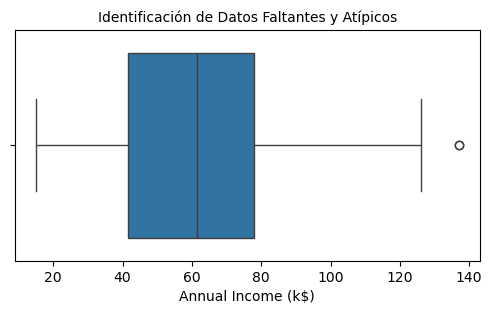

In [26]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=datos['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [27]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Edad: ",datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Ingreso Anual: ",datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Puntuación de Gasto: ",datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Ingreso Anual:  0
Cantidad de Registros con cero en Puntuación de Gasto:  0


In [28]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

datos['Annual Income (k$)']=datos['Annual Income (k$)'].replace(0,datos['Annual Income (k$)'].mean())

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

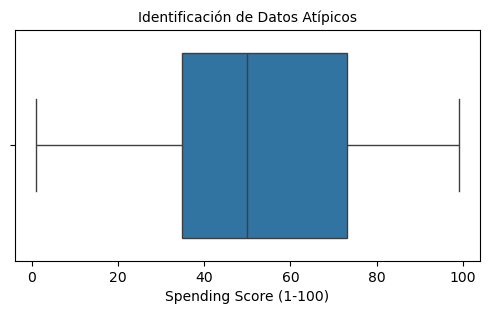

In [29]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=datos['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [30]:
nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((datos['Spending Score (1-100)']<nivel_minimo)|(datos['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [31]:
# Filtra Datos Atípicos

datos=datos[(datos['Spending Score (1-100)']<nivel_maximo)&(datos['Spending Score (1-100)']>nivel_minimo)]

In [32]:
#Revisión del tipo de datos y datos faltantes

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [33]:
# Filtrar columnas del modelo 

datos = datos[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [34]:
# Revisión de los datos de las variables objetivo

datos.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


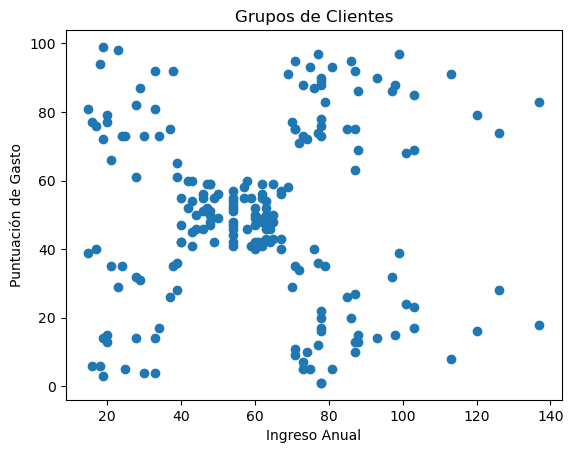

In [35]:
# Grafica antes del agrupamiento

plt.scatter(datos['Annual Income (k$)'], datos['Spending Score (1-100)'])
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntuación de Gasto')
plt.title('Grupos de Clientes')
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperparámetros


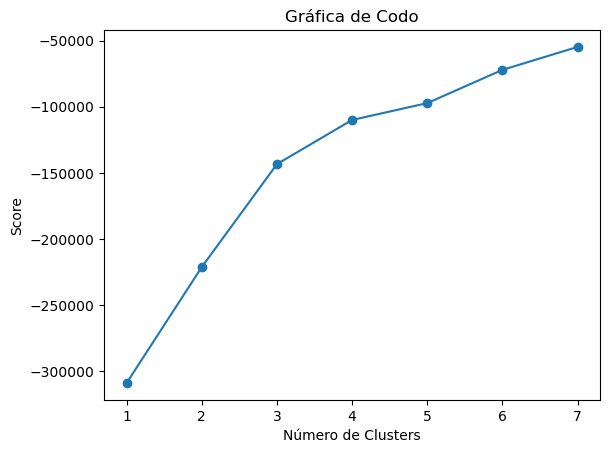

In [36]:
nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in nc]
kmeans
score = [kmeans[i].fit(datos).score(datos) for i in range(len(kmeans))]
score
plt.plot(nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [37]:
# Generación del modelo de Agrupamiento del modelo con K=5 (Es decir haremos 5 grupos de agrupamiento) 

Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(datos)

KMeans(n_clusters=5, random_state=0)

In [38]:
Modelo.labels_
datos["Grupo"] = Modelo.labels_ 
print (datos)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      2
1     21                  15                      81      2
2     20                  16                       6      0
3     23                  16                      77      2
4     31                  17                      40      0
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1
198   32                 137                      18      3
199   30                 137                      83      1

[200 rows x 4 columns]


## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc


In [42]:
Observaciones = len(datos)
X = datos.drop('Grupo', axis=1)
clusters = datos['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        200         |
|  Coeficiente Silhouette  | 0.3771108731967625 |
| Indice Calinski Harabasz | 133.49030043802063 |
|  Indice Davies Bouldin   | 0.9845471043038028 |
+--------------------------+--------------------+


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

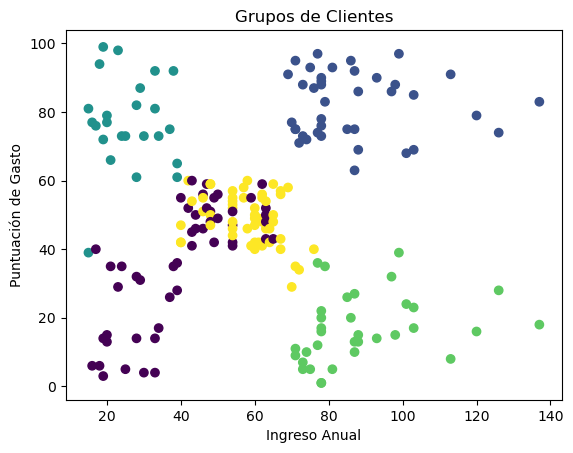

In [43]:
plt.scatter(datos['Annual Income (k$)'], datos['Spending Score (1-100)'], c=datos['Grupo'], cmap='viridis')
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntuación de Gasto')
plt.title('Grupos de Clientes')
plt.show()

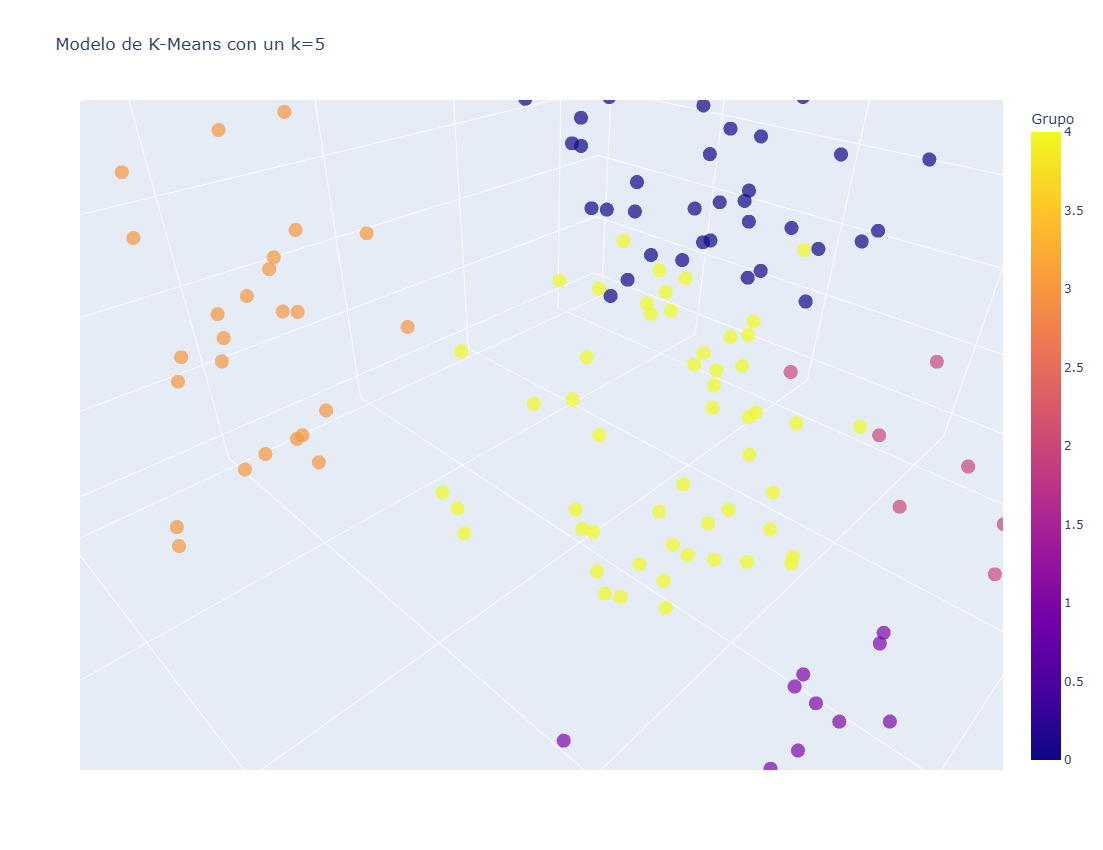

In [48]:
# Crear un modelo 3D de los datos agrupados
Grafica_3D = px.scatter_3d(
    datos, 
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    z='Age', 
    color='Grupo', 
    symbol='Grupo', 
    symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'}, 
    opacity=0.7, 
    width=900, 
    height=850, 
    title=f'Modelo de K-Means con un k={5}', 
    labels={'label': 'Cluster'}, 
    color_discrete_map={}
)
Grafica_3D.update_layout(showlegend=False)
Grafica_3D.show()

## 7. Interpretar, analizar y documentar los resultados obtenidos


**Desempeño del Modelo K-means**:
- **Coeficiente de Silhouette**: La puntuación de Silhouette obtenida es de aproximadamente **0.377**. Este valor indica una separación moderada entre los clusters. Una puntuación más cercana a 1 es ideal, ya que implica una separación más clara entre los grupos; sin embargo, este valor sugiere que puede haber una superposición considerable entre algunos clusters. Este nivel de separación implica que algunos clientes pueden compartir características con otros grupos, lo que podría dificultar una segmentación precisa.

- **Índice de Calinski-Harabasz**: La puntuación de Calinski-Harabasz es de **133.49**. Esta puntuación es relativamente baja, lo que sugiere que los clusters podrían no estar bien definidos en el espacio de características. En general, un valor más alto en esta métrica indica una mejor cohesión y separación entre los clusters, lo cual es menos evidente en este caso.

- **Índice Davies-Bouldin**: La puntuación de Davies-Bouldin obtenida es de **0.985**. Este índice mide la similitud entre los clusters; valores más bajos son preferibles, ya que indican una mayor separación entre los clusters. La puntuación obtenida aquí es cercana a 1, lo que sugiere que algunos clusters son relativamente similares entre sí, lo que podría dificultar una interpretación clara de cada grupo.

**Conclusiones Finales**:
En general, los resultados del modelo K-means muestran una segmentación moderada, con cierto grado de superposición entre los grupos de clientes. Esto puede ser indicativo de una estructura compleja en los datos, donde los clientes no se agrupan de forma completamente distinta. Este nivel de separación sugiere que se podría mejorar la segmentación utilizando métodos adicionales, como ajustar los hiperparámetros del modelo o probar diferentes conjuntos de características.

Esta segmentación ofrece una base útil para empezar a comprender las diferencias entre los clientes del centro comercial, aunque sería recomendable explorar métodos adicionales o combinaciones de algoritmos para obtener una separación más clara entre los grupos y así aplicar estrategias de marketing más específicas para cada segmento identificado.

  ## Hierarchial Clustering


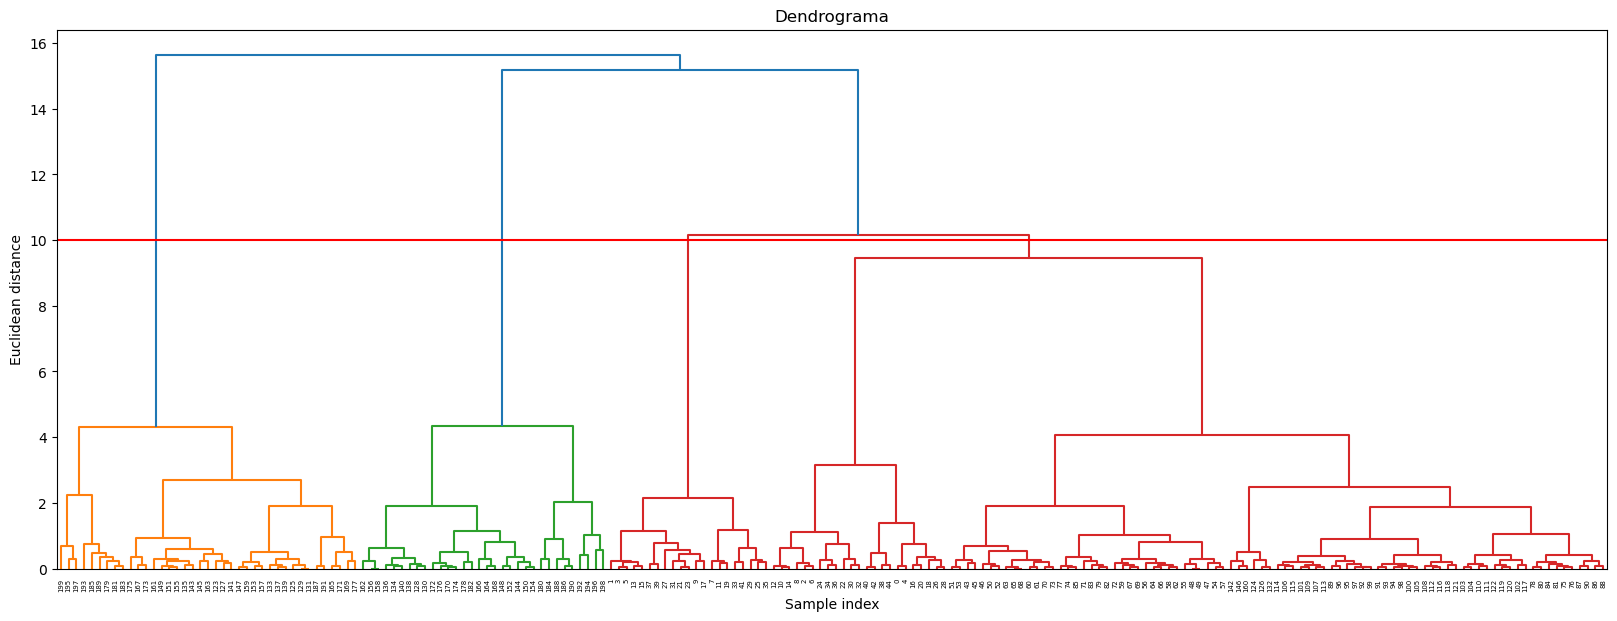

In [21]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [22]:
# Creamos un modelo de clustering aglomerativo con 3 clusters
hier_clustering = AgglomerativeClustering(n_clusters=3)

# Ajustamos el modelo a los datos y predecimos las etiquetas de los clusters
labels_hier = hier_clustering.fit_predict(X)

# Imprimimos las etiquetas de los clusters
labels_hier

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

In [24]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

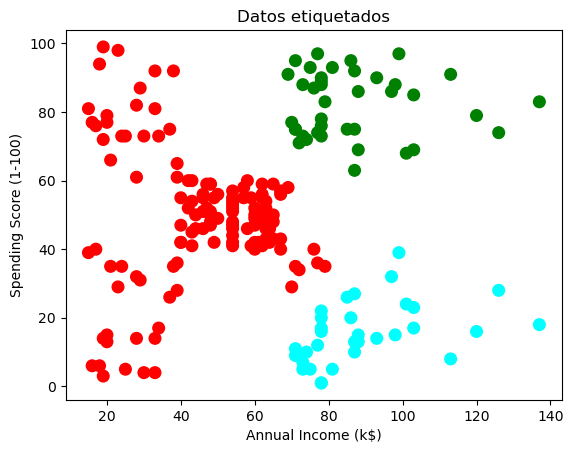

In [25]:
# Extrae los valores de las columnas necesarias antes de la normalización
f1 = data['Annual Income (k$)'].values
f2 = data['Spending Score (1-100)'].values

# Asume que 'asignar' contiene las etiquetas o clusters asignados previamente por K-means
# Ejemplo de inicialización de 'asignar' si ya tienes el modelo de clustering:
# asignar = kmeans.labels_  # Si usaste K-means

# Crea un gráfico de dispersión
plt.scatter(f1, f2, c=asignar, s=70)

# Añade un título al gráfico
plt.title('Datos etiquetados')

# Establece la etiqueta del eje x como 'Annual Income (k$)'
plt.xlabel('Annual Income (k$)')

# Establece la etiqueta del eje y como 'Spending Score (1-100)'
plt.ylabel('Spending Score (1-100)')

# Muestra el gráfico
plt.show()

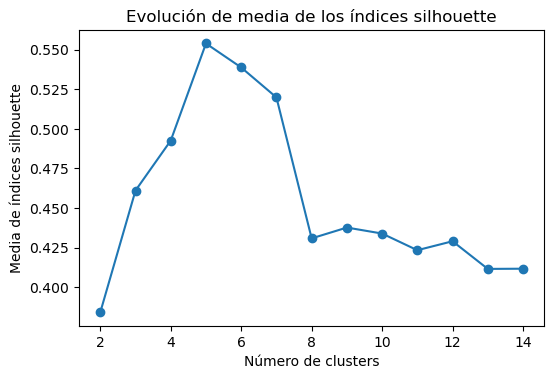

In [28]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    linkage='ward',  # Mantén solo este parámetro
                    n_clusters=n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número de clusters')
ax.set_ylabel('Media de índices silhouette')
plt.show()

In [29]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.4610481446570447
Índice de Calinski-Harabasz: 143.77956237851728
Davies-Bouldin Index: 0.7072871869794293


In [30]:
hier_clustering = AgglomerativeClustering(n_clusters=2)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [31]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.3842337621772661
Índice de Calinski-Harabasz: 86.96155571243868
Davies-Bouldin Index: 0.85435617569367


In [32]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.7209128193077099, array([10.14126314,  3.15032521, 10.14126314, ..., 15.62483742,
        0.68237721, 15.62483742]))


## Análisis de Resultados:

1. Puntaje de Silueta: 0.461

Interpretación: Este valor indica una separación moderada entre los clusters. Un puntaje de silueta cercano a 1 sugiere que los puntos están bien agrupados y distantes de otros grupos. Un puntaje de 0.461 sugiere que hay una cantidad considerable de superposición entre los clusters, lo que indica que los grupos no están claramente definidos.

2. Índice de Calinski-Harabasz: 143.78

Interpretación: Este índice mide la relación entre la varianza entre los grupos y la varianza dentro de los grupos. Un valor más alto generalmente indica que los clusters son compactos y bien separados. Con un índice de 143.78, se sugiere que hay una separación razonable entre los clusters, aunque no es excepcionalmente alto, lo que puede indicar que hay espacio para mejorar la separación.

3. Índice Davies-Bouldin: 0.707

Interpretación: Este índice evalúa la calidad del clustering teniendo en cuenta la distancia entre los grupos y la dispersión dentro de ellos. Un valor bajo indica una mejor calidad del clustering. Con un índice de 0.707, la distancia entre los clusters es aceptable, pero se puede considerar que hay margen para mejorar la separación y la compactación.